# Participant ID:S02

### Content:
- Correlation matrix 
- Comfort Function implementation
- Weather Station Data (During Commuting)
- Weather Station Data (Day of Commuting from 8am to 6pm)
- Living Lab (Day of Commuting from 8am to 6pm)

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from datetime import datetime


In [ ]:
## Read the CSV file into a DataFrame
S02_path = 'C:/Users/Tomar/dev/PCM_study/summer_2023/output/process_data/S02_final_df.csv'

S02_df = pd.read_csv(S02_path, index_col=False, parse_dates=['DateTime'])

In [ ]:
S02_df.columns

Index(['DateTime', 'ID_instance', 'hrv_vlf', 'hrv_lf', 'hrv_hf', 'hrv_sdnn',
       'hrv_rmssd', 'hrv_mean_nni', 'hrv_median_nni', 'hrv_range_nni',
       'hrv_entropy', 'eda_tonic_mean', 'eda_tonic_std', 'eda_tonic_sum',
       'eda_tonic_energy', 'eda_phasic_mean', 'eda_phasic_std',
       'eda_phasic_sum', 'eda_phasic_energy', 'acc_acc_x_min', 'acc_acc_y_min',
       'acc_acc_z_min', 'acc_l2_min', 'acc_acc_x_max', 'acc_acc_y_max',
       'acc_acc_z_max', 'acc_l2_max', 'acc_acc_x_ptp', 'acc_acc_y_ptp',
       'acc_acc_z_ptp', 'acc_l2_ptp', 'Temp(C)_N1', 'RH(%)_N1',
       'Dewpoint(C)_N1', 'Temp(C)_N2', 'RH(%)_N2', 'Dewpoint(C)_N2',
       'Temp(C)_N3', 'RH(%)_N3', 'Dewpoint(C)_N3', 'Temp(C)_N4', 'RH(%)_N4',
       'Dewpoint(C)_N4', 'Temp(C)_N5', 'RH(%)_N5', 'Dewpoint(C)_N5'],
      dtype='object')

In [ ]:
# Set 'DateTime' column as the index
S02_df.set_index('DateTime', inplace=True)

# Group by the unique ID instances
grouped = S02_df.groupby('ID_instance')

# Prepare a list to store the results
results = []

# Iterate through each group
for name, group in grouped:
    # Sort the group by DateTime if not already sorted
    group = group.sort_index()
    
    # Calculate the duration
    start_time = group.index[0]
    end_time = group.index[-1]
    duration = end_time - start_time
    
    # Calculate the min, max, and avg for Temp(C)_N1 and RH(%)_N1
    temp_n1_min = group['Temp(C)_N1'].min()
    temp_n1_max = group['Temp(C)_N1'].max()
    temp_n1_avg = group['Temp(C)_N1'].mean()
    
    rh_n1_min = group['RH(%)_N1'].min()
    rh_n1_max = group['RH(%)_N1'].max()
    rh_n1_avg = group['RH(%)_N1'].mean()
    
    # Append the result to the list
    results.append([name, start_time, end_time, duration, 
                    temp_n1_min, temp_n1_max, temp_n1_avg, 
                    rh_n1_min, rh_n1_max, rh_n1_avg])

# Create a DataFrame from the results list
results_df = pd.DataFrame(results, columns=['ID_instance', 'Start Time', 'End Time', 'Duration', 
                                            'Temp(C)_N1_min', 'Temp(C)_N1_max', 'Temp(C)_N1_avg',
                                            'RH(%)_N1_min', 'RH(%)_N1_max', 'RH(%)_N1_avg'])

# Print the results as a table
print(results_df)

   ID_instance          Start Time            End Time        Duration  \
0        S02_1 2023-07-31 16:33:54 2023-07-31 16:36:38 0 days 00:02:44   
1       S02_10 2023-08-03 17:21:02 2023-08-03 17:27:24 0 days 00:06:22   
2       S02_11 2023-08-04 22:13:08 2023-08-04 22:24:06 0 days 00:10:58   
3       S02_12 2023-08-05 05:49:36 2023-08-05 06:29:37 0 days 00:40:01   
4       S02_13 2023-08-05 14:05:21 2023-08-05 14:11:50 0 days 00:06:29   
5       S02_14 2023-08-05 15:47:28 2023-08-05 16:17:37 0 days 00:30:09   
6       S02_15 2023-08-06 08:48:20 2023-08-06 09:31:08 0 days 00:42:48   
7       S02_16 2023-08-06 09:48:21 2023-08-06 09:59:58 0 days 00:11:37   
8       S02_17 2023-08-07 07:07:35 2023-08-07 07:15:30 0 days 00:07:55   
9       S02_18 2023-08-07 12:52:42 2023-08-07 12:59:34 0 days 00:06:52   
10      S02_19 2023-08-07 18:21:39 2023-08-07 18:27:22 0 days 00:05:43   
11       S02_2 2023-08-01 16:38:07 2023-08-01 16:54:32 0 days 00:16:25   
12      S02_20 2023-08-08 06:40:41 202

In [ ]:
# Group by 'id_instance' and calculate time duration
time_duration = S02_df.groupby('ID_instance').apply(lambda x: x.index.max() - x.index.min())

# Convert time duration to seconds for better readability (optional)
time_duration = (time_duration.dt.total_seconds()/60).round(2)
# time_duration = time_duration.round(2)

print(time_duration)

ID_instance
S02_1      2.73
S02_10     6.37
S02_11    10.97
S02_12    40.02
S02_13     6.48
S02_14    30.15
S02_15    42.80
S02_16    11.62
S02_17     7.92
S02_18     6.87
S02_19     5.72
S02_2     16.42
S02_20    10.23
S02_21     7.17
S02_22    10.15
S02_23     6.85
S02_24     6.68
S02_25     7.58
S02_26    10.93
S02_27     5.58
S02_28     9.52
S02_29     6.67
S02_3     10.82
S02_30     6.13
S02_4     13.47
S02_5     10.33
S02_6      8.47
S02_7     10.23
S02_8      9.02
S02_9      6.78
dtype: float64


C:\Users\Tomar\AppData\Local\Temp\ipykernel_34452\2626818734.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  time_duration = S02_df.groupby('ID_instance').apply(lambda x: x.index.max() - x.index.min())


In [ ]:
instances_over_60_minutes = time_duration[time_duration > 60].index

# Remove rows corresponding to instances over 60 minutes inplace
S02_df.drop(S02_df[S02_df['ID_instance'].isin(instances_over_60_minutes)].index, inplace=True)


In [ ]:
S02_df.isnull().sum()

ID_instance          29
hrv_vlf               0
hrv_lf                0
hrv_hf                0
hrv_sdnn              0
hrv_rmssd             0
hrv_mean_nni          0
hrv_median_nni        0
hrv_range_nni         0
hrv_entropy           0
eda_tonic_mean        0
eda_tonic_std         0
eda_tonic_sum         0
eda_tonic_energy      0
eda_phasic_mean       0
eda_phasic_std        0
eda_phasic_sum        0
eda_phasic_energy     0
acc_acc_x_min         0
acc_acc_y_min         0
acc_acc_z_min         0
acc_l2_min            0
acc_acc_x_max         0
acc_acc_y_max         0
acc_acc_z_max         0
acc_l2_max            0
acc_acc_x_ptp         0
acc_acc_y_ptp         0
acc_acc_z_ptp         0
acc_l2_ptp            0
Temp(C)_N1            0
RH(%)_N1              0
Dewpoint(C)_N1        0
Temp(C)_N2            0
RH(%)_N2              0
Dewpoint(C)_N2        0
Temp(C)_N3            0
RH(%)_N3              0
Dewpoint(C)_N3        0
Temp(C)_N4            0
RH(%)_N4              0
Dewpoint(C)_N4  

In [ ]:
S02_df.dropna(subset=['ID_instance'], inplace=True)

In [ ]:
S02_df['ID_instance'].unique()

array(['S02_1', 'S02_2', 'S02_3', 'S02_4', 'S02_5', 'S02_6', 'S02_7',
       'S02_8', 'S02_9', 'S02_10', 'S02_11', 'S02_12', 'S02_13', 'S02_14',
       'S02_15', 'S02_16', 'S02_17', 'S02_18', 'S02_19', 'S02_20',
       'S02_21', 'S02_22', 'S02_23', 'S02_24', 'S02_25', 'S02_26',
       'S02_27', 'S02_28', 'S02_29', 'S02_30'], dtype=object)

In [ ]:
S02_df.columns

Index(['ID_instance', 'hrv_vlf', 'hrv_lf', 'hrv_hf', 'hrv_sdnn', 'hrv_rmssd',
       'hrv_mean_nni', 'hrv_median_nni', 'hrv_range_nni', 'hrv_entropy',
       'eda_tonic_mean', 'eda_tonic_std', 'eda_tonic_sum', 'eda_tonic_energy',
       'eda_phasic_mean', 'eda_phasic_std', 'eda_phasic_sum',
       'eda_phasic_energy', 'acc_acc_x_min', 'acc_acc_y_min', 'acc_acc_z_min',
       'acc_l2_min', 'acc_acc_x_max', 'acc_acc_y_max', 'acc_acc_z_max',
       'acc_l2_max', 'acc_acc_x_ptp', 'acc_acc_y_ptp', 'acc_acc_z_ptp',
       'acc_l2_ptp', 'Temp(C)_N1', 'RH(%)_N1', 'Dewpoint(C)_N1', 'Temp(C)_N2',
       'RH(%)_N2', 'Dewpoint(C)_N2', 'Temp(C)_N3', 'RH(%)_N3',
       'Dewpoint(C)_N3', 'Temp(C)_N4', 'RH(%)_N4', 'Dewpoint(C)_N4',
       'Temp(C)_N5', 'RH(%)_N5', 'Dewpoint(C)_N5'],
      dtype='object')

In [ ]:
# Drop columns starting with 'acc_'
S02_df = S02_df.filter(regex='^(?!acc_)')

In [ ]:
S02_df.columns[1:18]

Index(['hrv_vlf', 'hrv_lf', 'hrv_hf', 'hrv_sdnn', 'hrv_rmssd', 'hrv_mean_nni',
       'hrv_median_nni', 'hrv_range_nni', 'hrv_entropy', 'eda_tonic_mean',
       'eda_tonic_std', 'eda_tonic_sum', 'eda_tonic_energy', 'eda_phasic_mean',
       'eda_phasic_std', 'eda_phasic_sum', 'eda_phasic_energy'],
      dtype='object')

In [ ]:
S02_df.columns[18:30]

Index(['Temp(C)_N1', 'RH(%)_N1', 'Dewpoint(C)_N1', 'Temp(C)_N2', 'RH(%)_N2',
       'Dewpoint(C)_N2', 'Temp(C)_N3', 'RH(%)_N3', 'Dewpoint(C)_N3',
       'Temp(C)_N4', 'RH(%)_N4', 'Dewpoint(C)_N4'],
      dtype='object')

### Correlation matrix

In [ ]:
# Selecting physiological features (excluding Subject and Commuting columns)
physiological_data = S02_df.columns[1:18] 

# Selecting environmental parameters
environmental_data = S02_df.columns[18:30] 

# Calculating correlation matrix
correlation_matrix = S02_df[list(physiological_data) + list(environmental_data)].corr(method='spearman')

# Extracting correlations between physiological features and environmental parameters
correlation_phys_env = correlation_matrix.loc[physiological_data, environmental_data]

correlation_phys_env


,Temp(C)_N1,RH(%)_N1,Dewpoint(C)_N1,Temp(C)_N2,RH(%)_N2,Dewpoint(C)_N2,Temp(C)_N3,RH(%)_N3,Dewpoint(C)_N3,Temp(C)_N4,RH(%)_N4,Dewpoint(C)_N4
hrv_vlf,-0.127767,0.230996,-0.062084,-0.188312,0.290757,-0.065806,-0.021776,0.164355,0.013938,-0.094774,0.198137,-0.011195
hrv_lf,-0.220062,0.272121,-0.061823,-0.247892,0.239652,-0.125616,-0.122544,0.066689,-0.142234,-0.311133,0.345454,-0.055484
hrv_hf,-0.421673,0.389690,-0.286332,-0.464629,0.203547,-0.368316,-0.142081,0.043164,-0.181260,-0.550261,0.541207,-0.308549
hrv_sdnn,-0.411284,0.446681,-0.269937,-0.448638,0.258756,-0.354434,-0.147462,0.101043,-0.185133,-0.509448,0.517583,-0.263381
hrv_rmssd,-0.484907,0.390996,-0.418480,-0.499317,0.092648,-0.497507,-0.189250,0.065171,-0.233423,-0.583210,0.495592,-0.433956
hrv_mean_nni,-0.120150,0.069348,-0.087823,-0.049483,-0.315560,-0.306071,0.105223,0.107606,0.316649,-0.100078,0.145027,-0.128137
hrv_median_nni,-0.150111,0.096617,-0.105686,-0.084286,-0.284798,-0.319664,0.096685,0.119749,0.294222,-0.125153,0.167574,-0.145527
hrv_range_nni,-0.370029,0.416372,-0.256699,-0.403359,0.254843,-0.308515,-0.122912,0.058666,-0.191172,-0.441512,0.447169,-0.225676
hrv_entropy,0.112436,-0.137084,0.030090,0.143630,0.004126,0.149733,-0.128285,-0.057471,-0.217970,0.222653,-0.298510,0.083581
eda_tonic_mean,0.488781,-0.379474,0.413850,0.362856,0.004655,0.484514,0.179297,-0.033302,0.362998,0.657399,-0.589844,0.462057


### Correlation heatmap

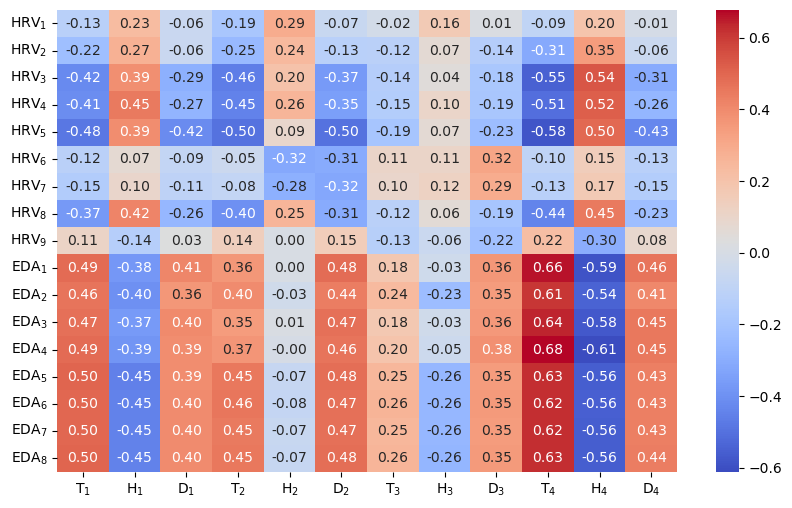

In [ ]:
# Define the new column names with LaTeX subscript representation
new_column_names = {
    'Temp(C)_N1': 'T$_{1}$',
    'RH(%)_N1': 'H$_{1}$',
    'Dewpoint(C)_N1': 'D$_{1}$',
    'Temp(C)_N2': 'T$_{2}$',
    'RH(%)_N2': 'H$_{2}$',
    'Dewpoint(C)_N2': 'D$_{2}$',
    'Temp(C)_N3': 'T$_{3}$',
    'RH(%)_N3': 'H$_{3}$',
    'Dewpoint(C)_N3': 'D$_{3}$',
    'Temp(C)_N4': 'T$_{4}$',
    'RH(%)_N4': 'H$_{4}$',
    'Dewpoint(C)_N4': 'D$_{4}$',

    'hrv_vlf': 'HRV$_1$',
    'hrv_lf': 'HRV$_2$',
    'hrv_hf': 'HRV$_3$',
    'hrv_sdnn': 'HRV$_4$',
    'hrv_rmssd': 'HRV$_5$',
    'hrv_mean_nni': 'HRV$_6$',
    'hrv_median_nni': 'HRV$_7$',
    'hrv_range_nni': 'HRV$_8$',
    'hrv_entropy': 'HRV$_9$',

    'eda_tonic_mean': 'EDA$_1$',
    'eda_tonic_std': 'EDA$_2$',
    'eda_tonic_sum': 'EDA$_3$',
    'eda_tonic_energy': 'EDA$_4$',
    'eda_phasic_mean': 'EDA$_5$',
    'eda_phasic_std': 'EDA$_6$',
    'eda_phasic_sum': 'EDA$_7$',
    'eda_phasic_energy': 'EDA$_8$',

    # 'acc_acc_x_min': 'ACC$_1$',
    # 'acc_acc_y_min': 'ACC$_2$' ,
    # 'acc_acc_z_min': 'ACC$_3$', 
    # 'acc_l2_min': 'ACC$_4$',
    # 'acc_acc_x_max': 'ACC$_5$',
    # 'acc_acc_y_max': 'ACC$_6$', 
    # 'acc_acc_z_max': 'ACC$_7$', 
    # 'acc_l2_max': 'ACC$_8$',
    # 'acc_acc_x_ptp': 'ACC$_9$', 
    # 'acc_acc_y_ptp': 'ACC$_{10}$', 
    # 'acc_acc_z_ptp': 'ACC$_{11}$', 
    # 'acc_l2_ptp': 'ACC$_{12}$'
}

# Rename columns
correlation_phys_env_renamed = correlation_phys_env.rename(columns=new_column_names, index=new_column_names)

# Set up the matplotlib figure
plt.figure(figsize=(10, 6))

# Generate a heatmap of the correlation matrix
sns.heatmap(correlation_phys_env_renamed, annot=True, cmap='coolwarm', fmt=".2f")

# Add titles and labels
# plt.title('S02')
# plt.xlabel('environmental parameters', fontsize=14)
# plt.ylabel('physiological features', fontsize=14)

# Rotate the y-axis labels for better readability
plt.yticks(rotation=0)
plt.xticks(rotation=0)

# Save the plot as eps & png file
outpath = 'C:/Users/Tomar/dev/PCM_study/summer_2023/output/viz/'
plt.savefig(outpath+'S02_heatmap.eps', format='eps', bbox_inches='tight')
plt.savefig(outpath+'S02_heatmap.png', format='png', bbox_inches='tight')

# Show the plot
plt.show()


### Comfort function Implementation

In [ ]:
# List of all physiological variables
physio_vars = ['hrv_vlf', 'hrv_lf', 'hrv_hf', 'hrv_sdnn', 'hrv_rmssd',
               'hrv_mean_nni', 'hrv_median_nni', 'hrv_range_nni', 'hrv_entropy',
               'eda_tonic_mean', 'eda_tonic_std', 'eda_tonic_sum', 'eda_tonic_energy',
               'eda_phasic_mean', 'eda_phasic_std', 'eda_phasic_sum', 'eda_phasic_energy']

# Environmental variables to consider
env_vars = ['Temp(C)_N1', 'RH(%)_N1']

# Compute Spearman correlations
correlations = S02_df[physio_vars + env_vars].corr(method='spearman')

# HRV and EDA groups for correlation
hrv_vars = physio_vars[:9]  # Assuming the first 9 are HRV related
eda_vars = physio_vars[9:]  # Assuming the rest are EDA related

# Identify one HRV and one EDA variable with the strongest correlation with any environmental variable
strongest_corr_hrv = correlations.loc[hrv_vars, env_vars].abs().max().idxmax()
strongest_corr_eda = correlations.loc[eda_vars, env_vars].abs().max().idxmax()

# Extract the specific HRV and EDA variable names with the highest correlation
strongest_corr_hrv_var = correlations.loc[hrv_vars, env_vars].abs().idxmax()[strongest_corr_hrv]
strongest_corr_eda_var = correlations.loc[eda_vars, env_vars].abs().idxmax()[strongest_corr_eda]

# Define thresholds using the identified variables and adjusted quartiles for environmental variables
thresholds = {
    strongest_corr_hrv_var: S02_df[strongest_corr_hrv_var].quantile(0.75),
    strongest_corr_eda_var: S02_df[strongest_corr_eda_var].quantile(0.25),
    'Temp(C)_N1': [S02_df['Temp(C)_N1'].quantile(0.30), S02_df['Temp(C)_N1'].quantile(0.65)],
    'RH(%)_N1': [S02_df['RH(%)_N1'].quantile(0.30), S02_df['RH(%)_N1'].quantile(0.65)]
}

# Define the comfort function
def comfort_label(row):
    comfort = (row[strongest_corr_hrv_var] >= thresholds[strongest_corr_hrv_var] and
               row[strongest_corr_eda_var] <= thresholds[strongest_corr_eda_var] and
               thresholds['Temp(C)_N1'][0] <= row['Temp(C)_N1'] <= thresholds['Temp(C)_N1'][1] and
               thresholds['RH(%)_N1'][0] <= row['RH(%)_N1'] <= thresholds['RH(%)_N1'][1])
    
    if comfort:
        return 1
    
    discomfort = (row[strongest_corr_hrv_var] < thresholds[strongest_corr_hrv_var] and
                  row[strongest_corr_eda_var] > thresholds[strongest_corr_eda_var] and
                  not (thresholds['Temp(C)_N1'][0] <= row['Temp(C)_N1'] <= thresholds['Temp(C)_N1'][1]) or
                  not (thresholds['RH(%)_N1'][0] <= row['RH(%)_N1'] <= thresholds['RH(%)_N1'][1]))
    
    if discomfort:
        return 0
    
    return 0.5  # Sensible label for ambiguous cases

# Apply the comfort function and count labels
S02_df['lambda'] = S02_df.apply(comfort_label, axis=1)
label_counts = S02_df['lambda'].value_counts(normalize=True) * 100

# Print the names of variables used for the comfort function
print("Variables considered for the comfort function:")
print(f"HRV Variable: {strongest_corr_hrv_var}")
print(f"EDA Variable: {strongest_corr_eda_var}")
print("Environmental Variables: Temp(C)_N1, RH(%)_N1")

# Print the percentage of labeled values
print("Label Distribution (%):")
print(label_counts)

print("saving data files as pkl")
savepath = 'C:/Users/Tomar/dev/PCM_study/summer_2023/output/final_data/data_S02.pkl'
S02_df.to_pickle(savepath)

Variables considered for the comfort function:
HRV Variable: hrv_rmssd
EDA Variable: eda_phasic_mean
Environmental Variables: Temp(C)_N1, RH(%)_N1
Label Distribution (%):
lambda
0.0    75.137615
0.5    23.481410
1.0     1.380975
Name: proportion, dtype: float64
saving data files as pkl


C:\Users\Tomar\AppData\Local\Temp\ipykernel_34452\1965468333.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  S02_df['lambda'] = S02_df.apply(comfort_label, axis=1)


In [ ]:
# Group by unique instances
instance_groups = S02_df.groupby('ID_instance')

# Calculate the level of comfort for each instance
comfort_levels = instance_groups['lambda'].mean()  # You can also use .median() or .mode() depending on your preference

# Print the comfort levels
print(comfort_levels)


ID_instance
S02_1     0.000000
S02_10    0.000000
S02_11    0.000000
S02_12    0.000000
S02_13    0.506410
S02_14    0.000000
S02_15    0.000000
S02_16    0.000000
S02_17    0.000000
S02_18    0.000000
S02_19    0.511628
S02_2     0.000000
S02_20    0.069919
S02_21    0.500000
S02_22    0.500000
S02_23    0.486650
S02_24    0.000000
S02_25    0.224781
S02_26    0.001522
S02_27    0.000000
S02_28    0.500000
S02_29    0.500000
S02_3     0.616154
S02_30    0.000000
S02_4     0.330037
S02_5     0.021739
S02_6     0.000000
S02_7     0.000000
S02_8     0.569188
S02_9     0.001225
Name: lambda, dtype: float64


### Weather Station Data (During Commuting):

In [ ]:
import pandas as pd

# Load the weather data from the uploaded Excel file
file_path = 'C:/Users/Tomar/dev/datasets/weather_summer2023.xlsx'
weather_data = pd.read_excel(file_path)

# Display the first few rows of the weather data to understand its structure
weather_data.head()


,Data,Relative Humidity Min (%),Relative Humidity Ave (%),Relative Humidity Max (%),Relative Humidity StDev (%),Air Temperature Min ('C),Air Temperature Ave ('C),Air Temperature Max ('C),Air Temperature StDev ('C),Solar Radiation Min (W/m2),...,Wind direction PrevDir (>),Wind direction RisDir (>),Wind direction RisVel (m/s),Wind direction StdDevDir (>),Wind direction CalmPerc (%),Wind speed Min (m/s),Wind speed Ave (m/s),Wind speed Max (m/s),Wind speed StDev (m/s),Rainfall Tot (mm)
0,2023-07-01 00:00:00,99.40,99.41,99.42,0.0,15.50,15.60,15.69,0.0,0.0,...,298,290,1.0,53,6,0.0,1.3,3.0,0.6,0.0
1,2023-07-01 00:10:00,99.40,99.41,99.41,0.0,15.55,15.65,15.74,0.0,0.0,...,165,155,0.5,69,25,0.0,0.8,1.9,0.5,0.2
2,2023-07-01 00:20:00,99.40,99.41,99.42,0.0,15.60,15.67,15.74,0.0,0.0,...,296,296,0.8,29,29,0.0,0.7,1.5,0.5,0.0
3,2023-07-01 00:30:00,99.40,99.41,99.42,0.0,15.55,15.64,15.75,0.0,0.0,...,333,336,0.6,69,17,0.0,0.8,2.6,0.6,0.0
4,2023-07-01 00:40:00,99.39,99.40,99.40,0.0,15.46,15.51,15.58,0.0,0.0,...,327,324,1.6,20,3,0.0,1.6,2.6,0.6,0.0


In [ ]:
# Define the commuting instance data
commuting_data = [
    {"ID_instance": "S02_1", "Start Time" : "2023-07-31 16:33:54", "End Time": "2023-07-31 16:36:38"},
    {"ID_instance": "S02_2", "Start Time" : "2023-08-01 16:38:07", "End Time": "2023-08-01 16:54:32"},
    {"ID_instance": "S02_3", "Start Time" : "2023-08-01 20:34:40", "End Time": "2023-08-01 20:45:29"},
    {"ID_instance": "S02_4", "Start Time" : "2023-08-02 07:13:16", "End Time": "2023-08-02 07:26:44"},
    {"ID_instance": "S02_5", "Start Time" : "2023-08-02 11:06:22", "End Time": "2023-08-02 11:16:42"},
    {"ID_instance": "S02_6", "Start Time" : "2023-08-02 12:33:00", "End Time": "2023-08-02 12:41:28"},
    {"ID_instance": "S02_7", "Start Time" : "2023-08-02 16:18:34", "End Time": "2023-08-02 16:28:48"},
    {"ID_instance": "S02_8", "Start Time" : "2023-08-03 07:09:01", "End Time": "2023-08-03 07:18:02"},
    {"ID_instance": "S02_9", "Start Time" : "2023-08-03 16:39:40", "End Time": "2023-08-03 16:46:27"},
    {"ID_instance": "S02_10", "Start Time": "2023-08-03 17:21:02", "End Time": "2023-08-03 17:27:24"},
    {"ID_instance": "S02_11", "Start Time": "2023-08-04 22:13:08", "End Time": "2023-08-04 22:24:06"},
    {"ID_instance": "S02_12", "Start Time": "2023-08-05 05:49:36", "End Time": "2023-08-05 06:29:37"},
    {"ID_instance": "S02_13", "Start Time": "2023-08-05 14:05:21", "End Time": "2023-08-05 14:11:50"},
    {"ID_instance": "S02_14", "Start Time": "2023-08-05 15:47:28", "End Time": "2023-08-05 16:17:37"},
    {"ID_instance": "S02_15", "Start Time": "2023-08-06 08:48:20", "End Time": "2023-08-06 09:31:08"},
    {"ID_instance": "S02_16", "Start Time": "2023-08-06 09:48:21", "End Time": "2023-08-06 09:59:58"},
    {"ID_instance": "S02_17", "Start Time": "2023-08-07 07:07:35", "End Time": "2023-08-07 07:15:30"},
    {"ID_instance": "S02_18", "Start Time": "2023-08-07 12:52:42", "End Time": "2023-08-07 12:59:34"},
    {"ID_instance": "S02_19", "Start Time": "2023-08-07 18:21:39", "End Time": "2023-08-07 18:27:22"},
    {"ID_instance": "S02_20", "Start Time": "2023-08-08 06:40:41", "End Time": "2023-08-08 06:50:55"},
    {"ID_instance": "S02_21", "Start Time": "2023-08-08 10:18:33", "End Time": "2023-08-08 10:25:43"},
    {"ID_instance": "S02_22", "Start Time": "2023-08-08 16:43:22", "End Time": "2023-08-08 16:53:31"},
    {"ID_instance": "S02_23", "Start Time": "2023-08-09 06:32:09", "End Time": "2023-08-09 06:39:00"},
    {"ID_instance": "S02_24", "Start Time": "2023-08-09 16:07:41", "End Time": "2023-08-09 16:14:22"},
    {"ID_instance": "S02_25", "Start Time": "2023-08-10 07:19:12", "End Time": "2023-08-10 07:26:47"},
    {"ID_instance": "S02_26", "Start Time": "2023-08-10 11:01:34", "End Time": "2023-08-10 11:12:30"},
    {"ID_instance": "S02_27", "Start Time": "2023-08-10 12:42:41", "End Time": "2023-08-10 12:48:16"},
    {"ID_instance": "S02_28", "Start Time": "2023-08-10 16:52:05", "End Time": "2023-08-10 17:01:36"},
    {"ID_instance": "S02_29", "Start Time": "2023-08-11 07:08:23", "End Time": "2023-08-11 07:15:03"},
    {"ID_instance": "S02_30", "Start Time": "2023-08-11 12:01:19", "End Time": "2023-08-11 12:07:27"},




]

# Convert the commuting instance data to a DataFrame
commuting_df = pd.DataFrame(commuting_data)

# Convert the Start Time and End Time columns to datetime
commuting_df['Start Time'] = pd.to_datetime(commuting_df['Start Time'])
commuting_df['End Time'] = pd.to_datetime(commuting_df['End Time'])

# Display the commuting instance DataFrame
commuting_df.head()


,ID_instance,Start Time,End Time
0,S02_1,2023-07-31 16:33:54,2023-07-31 16:36:38
1,S02_2,2023-08-01 16:38:07,2023-08-01 16:54:32
2,S02_3,2023-08-01 20:34:40,2023-08-01 20:45:29
3,S02_4,2023-08-02 07:13:16,2023-08-02 07:26:44
4,S02_5,2023-08-02 11:06:22,2023-08-02 11:16:42


In [ ]:
# Convert the Data column in weather data to datetime
weather_data['Data'] = pd.to_datetime(weather_data['Data'])

# Initialize an empty list to store the results
results = []

# Iterate over each commuting instance
for _, row in commuting_df.iterrows():
    # Filter the weather data within the date-time range of the commuting instance
    mask = (weather_data['Data'] >= row['Start Time']) & (weather_data['Data'] <= row['End Time'])
    filtered_data = weather_data[mask]
    
    # Calculate the average, min, and max for Air Temperature and Relative Humidity 
    min_temp = filtered_data['Air Temperature Min (\'C)'].min()
    max_temp = filtered_data['Air Temperature Max (\'C)'].max()
    avg_temp = filtered_data['Air Temperature Ave (\'C)'].mean()

    min_rh = filtered_data['Relative Humidity Min (%)'].min()
    max_rh = filtered_data['Relative Humidity Max (%)'].max()
    avg_rh = filtered_data['Relative Humidity Ave (%)'].mean()
    
    # min_sr = filtered_data['Solar Radiation Ave (W/m2)'].min()
    # max_sr = filtered_data['Solar Radiation Ave (W/m2)'].max()
    avg_sr = filtered_data['Solar Radiation Ave (W/m2)'].mean()

    # Append the results
    results.append({
        'ID_instance': row['ID_instance'],
        'Min_Air_Temperature': min_temp,
        'Max_Air_Temperature': max_temp,
        'Avg_Air_Temperature': avg_temp,
        'Min_Relative_Humidity': min_rh,
        'Max_Relative_Humidity': max_rh,
        'Avg_Relative_Humidity': avg_rh,
        'Avg_Solar_Radiation': avg_sr
    })

# Convert the results to a DataFrame
results_df = pd.DataFrame(results)

# Display the results
results_df


,ID_instance,Min_Air_Temperature,Max_Air_Temperature,Avg_Air_Temperature,Min_Relative_Humidity,Max_Relative_Humidity,Avg_Relative_Humidity,Avg_Solar_Radiation
0,S02_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,S02_2,29.41,30.38,29.8150,34.97,37.33,36.2850,413.3100
2,S02_3,25.53,25.69,25.5800,45.81,46.80,46.3900,0.0000
3,S02_4,21.44,22.20,21.7000,74.49,78.78,76.4900,126.2700
4,S02_5,26.82,27.66,27.1400,41.88,45.00,43.7300,954.1900
5,S02_6,28.79,29.97,29.2900,37.93,40.79,39.3400,1089.6600
6,S02_7,31.13,31.91,31.4800,31.78,33.81,32.7500,719.3600
7,S02_8,20.22,20.80,20.5800,76.84,80.77,78.7600,107.3000
8,S02_9,29.55,30.22,29.9500,46.03,47.82,47.0100,623.1600
9,S02_10,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Weather Station Data (Day of Commuting from 8am to 6pm):

In [ ]:
import pandas as pd

# Load the data from the provided Excel file
file_path = 'C:/Users/Tomar/dev/datasets/weather_summer2023.xlsx'
data = pd.read_excel(file_path)

# Convert the 'Data' column to datetime format
data['Data'] = pd.to_datetime(data['Data'])

# Define the date ranges as given in the task
date_ranges = [
    ("2023-07-31 08:00:00", "2023-07-31 18:00:00"),
    ("2023-08-01 08:00:00", "2023-08-01 18:00:00"),
    ("2023-08-02 08:00:00", "2023-08-02 18:00:00"),
    ("2023-08-03 08:00:00", "2023-08-03 18:00:00"),
    ("2023-08-04 08:00:00", "2023-08-04 18:00:00"),
    ("2023-08-07 08:00:00", "2023-08-07 18:00:00"),
    ("2023-08-08 08:00:00", "2023-08-08 18:00:00"),
    ("2023-08-09 08:00:00", "2023-08-09 18:00:00"),
    ("2023-08-10 08:00:00", "2023-08-10 18:00:00"),
    ("2023-08-11 08:00:00", "2023-08-11 18:00:00")
]

# Initialize a list to store statistics for each day
daily_statistics = []

# Calculate statistics for each date range
for start, end in date_ranges:
    day_data = data[(data['Data'] >= start) & (data['Data'] <= end)]
    
    stats = {
        'Date Range': f'{start} to {end}',
        'Min_Air_Temperature': day_data["Air Temperature Min ('C)"].min(),
        'Max_Air_Temperature': day_data["Air Temperature Max ('C)"].max(),
        'Avg_Air_Temperature': day_data["Air Temperature Ave ('C)"].mean(),
        'Min_Relative_Humidity': day_data['Relative Humidity Min (%)'].min(),
        'Max_Relative_Humidity': day_data['Relative Humidity Max (%)'].max(),
        'Avg_Relative_Humidity': day_data['Relative Humidity Ave (%)'].mean(),
        'Avg_Solar_Radiation': day_data['Solar Radiation Ave (W/m2)'].mean()
    }
    
    daily_statistics.append(stats)

# Convert the results to a DataFrame for better readability
daily_statistics_df = pd.DataFrame(daily_statistics)
daily_statistics_df


,Date Range,Min_Air_Temperature,Max_Air_Temperature,Avg_Air_Temperature,Min_Relative_Humidity,Max_Relative_Humidity,Avg_Relative_Humidity,Avg_Solar_Radiation
0,2023-07-31 08:00:00 to 2023-07-31 18:00:00,21.59,32.85,28.886557,25.55,59.83,36.206393,710.517049
1,2023-08-01 08:00:00 to 2023-08-01 18:00:00,21.86,30.87,27.803279,33.27,65.16,45.536721,590.019180
2,2023-08-02 08:00:00 to 2023-08-02 18:00:00,21.51,32.50,28.056230,29.91,75.34,44.900328,754.557049
3,2023-08-03 08:00:00 to 2023-08-03 18:00:00,21.74,31.17,28.050164,42.64,77.74,53.510492,733.048525
4,2023-08-04 08:00:00 to 2023-08-04 18:00:00,17.52,27.29,22.772623,57.25,99.41,78.601475,316.800984
5,2023-08-07 08:00:00 to 2023-08-07 18:00:00,17.93,27.72,24.161803,19.34,65.61,40.487377,786.051639
6,2023-08-08 08:00:00 to 2023-08-08 18:00:00,16.95,29.23,25.329672,11.19,60.22,26.454590,802.498361
7,2023-08-09 08:00:00 to 2023-08-09 18:00:00,19.21,29.78,25.980492,20.05,55.21,30.910000,748.205574
8,2023-08-10 08:00:00 to 2023-08-10 18:00:00,19.40,31.70,27.231967,26.19,62.08,37.206393,710.445738
9,2023-08-11 08:00:00 to 2023-08-11 18:00:00,20.73,31.15,28.197377,33.60,66.78,42.484918,700.647049


### Living Lab (Day of Commuting from 8am to 6pm):

In [ ]:
# Load the CSV file
file_path = 'C:/Users/Tomar/dev/PCM_study/summer_2023/output/living_lab/LL/LL_b.csv'
data = pd.read_csv(file_path)

# Ensure the correct renaming of the 'DateTime' column to 'Timestamp'
data.rename(columns={'DateTime': 'Timestamp'}, inplace=True)

# Convert the 'Timestamp' column to datetime
data['Timestamp'] = pd.to_datetime(data['Timestamp'])

# Define the start and end times for each day
time_intervals = [
    ("2023-07-31 08:00:00", "2023-07-31 18:00:00"),
    ("2023-08-01 08:00:00", "2023-08-01 18:00:00"),
    ("2023-08-02 08:00:00", "2023-08-02 18:00:00"),
    ("2023-08-03 08:00:00", "2023-08-03 18:00:00"),
    ("2023-08-04 08:00:00", "2023-08-04 18:00:00"),
    ("2023-08-07 08:00:00", "2023-08-07 18:00:00"),
    ("2023-08-08 08:00:00", "2023-08-08 18:00:00"),
    ("2023-08-09 08:00:00", "2023-08-09 18:00:00"),
    ("2023-08-10 08:00:00", "2023-08-10 18:00:00"),
    ("2023-08-11 08:00:00", "2023-08-11 18:00:00")
    
]

# Convert string times to datetime
time_intervals = [(datetime.strptime(start, "%Y-%m-%d %H:%M:%S"), datetime.strptime(end, "%Y-%m-%d %H:%M:%S")) for start, end in time_intervals]

# Initialize a list to store results
results_list = []

# Process each time interval
for start, end in time_intervals:
    # Filter data based on time interval
    filtered_data = data[(data['Timestamp'] >= start) & (data['Timestamp'] <= end)]
    
    # Calculate required metrics
    result = {
        'Start_Time': start,
        'End_Time': end,
        'Min_Temp_Air': filtered_data['Temp_Air(C)'].min(),
        'Max_Temp_Air': filtered_data['Temp_Air(C)'].max(),
        'Avg_Temp_Air': filtered_data['Temp_Air(C)'].mean(),
        'Min_Temp_Globe': filtered_data['Temp_Globe(C)'].min(),
        'Max_Temp_Globe': filtered_data['Temp_Globe(C)'].max(),
        'Avg_Temp_Globe': filtered_data['Temp_Globe(C)'].mean(),
        'Min_Relative_Humidity': filtered_data['RH(%)'].min(),
        'Max_Relative_Humidity': filtered_data['RH(%)'].max(),
        'Mean_Relative_Humidity': filtered_data['RH(%)'].mean(),
    }
    
    # Append result to the list
    results_list.append(result)

# Create a DataFrame from the results list
results_df = pd.DataFrame(results_list)

# Display the results
results_df


,Start_Time,End_Time,Min_Temp_Air,Max_Temp_Air,Avg_Temp_Air,Min_Temp_Globe,Max_Temp_Globe,Avg_Temp_Globe,Min_Relative_Humidity,Max_Relative_Humidity,Mean_Relative_Humidity
0,2023-07-31 08:00:00,2023-07-31 18:00:00,25.1,27.1,25.636106,25.5,27.3,25.976040,56.4,62.7,61.034775
1,2023-08-01 08:00:00,2023-08-01 18:00:00,23.3,26.7,25.001997,23.7,26.8,25.369551,56.7,67.6,62.628120
2,2023-08-02 08:00:00,2023-08-02 18:00:00,22.9,26.4,24.144260,23.4,26.6,24.563894,58.0,68.3,64.649085
3,2023-08-03 08:00:00,2023-08-03 18:00:00,24.6,26.5,25.186689,24.9,26.6,25.525458,60.2,69.0,65.729784
4,2023-08-04 08:00:00,2023-08-04 18:00:00,24.5,26.3,25.119634,24.8,26.3,25.417637,64.4,69.7,67.497338
5,2023-08-07 08:00:00,2023-08-07 18:00:00,23.9,25.7,24.935275,24.1,25.9,25.158236,43.8,59.9,55.697504
6,2023-08-08 08:00:00,2023-08-08 18:00:00,25.5,26.1,25.826622,25.6,26.2,25.989018,39.3,53.4,46.259068
7,2023-08-09 08:00:00,2023-08-09 18:00:00,25.4,26.2,25.953910,25.6,26.4,26.096007,42.6,49.4,45.805491
8,2023-08-10 08:00:00,2023-08-10 18:00:00,25.7,26.9,26.235774,25.8,27.1,26.393344,48.0,51.9,49.880366
9,2023-08-11 08:00:00,2023-08-11 18:00:00,25.9,26.7,26.362729,26.1,26.8,26.524958,53.3,55.1,54.238103
